In [1]:
import pickle
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import torch
from torch.utils.data import Dataset
from skimage import io
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
import pickle
import time
import torch.optim as optim
import seaborn as sns
from tqdm.notebook import trange, tqdm
%matplotlib inline

In [2]:
!wget https://www.dropbox.com/s/nes12l1x7pehv46/train.tar.gz

--2020-11-11 07:09:01--  https://www.dropbox.com/s/nes12l1x7pehv46/train.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nes12l1x7pehv46/train.tar.gz [following]
--2020-11-11 07:09:02--  https://www.dropbox.com/s/raw/nes12l1x7pehv46/train.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5a525ad4bbd803281f2f64d5cf.dl.dropboxusercontent.com/cd/0/inline/BC_owr3wSwQZUeJz19sYFbyOjN-rCWSsgQX-c0sHMaNEStDSpqEScS6z11ppMF_E9t2BtP-4UOTskfsUpVjOuh5WjMP7ElaXDK7Q0tgbpmSn2-4ulcEd_0F_PKacEhHHUFc/file# [following]
--2020-11-11 07:09:02--  https://uc5a525ad4bbd803281f2f64d5cf.dl.dropboxusercontent.com/cd/0/inline/BC_owr3wSwQZUeJz19sYFbyOjN-rCWSsgQX-c0sHMaNEStDSpqEScS6z11ppMF_E9t2BtP-4UOTskfsUpVjOuh5WjMP7ElaXDK7Q0tgbpmSn2-4ulc

In [ ]:
!tar --gunzip --extract --verbose --file=train.tar.gz

In [4]:
!rm train.tar.gz

In [5]:
with open('/content/index.pkl', 'rb') as f:
    data_index = pickle.load(f)

In [ ]:
data_index

In [189]:
data = pd.DataFrame(data_index)
data.head()

,jpg_filename,lon,lat,mask_fname,mission,devID,observations_dt,observed_TCC
0,img-2019-12-11T10-02-37devID2.jpg,-10.783049,41.343315,AMK79/masks/mask-id2.png,AMK79,2,2019-12-11 10:00:00.000,4
1,img-2019-12-11T09-56-17devID2.jpg,-10.775720,41.359167,AMK79/masks/mask-id2.png,AMK79,2,2019-12-11 10:00:00.000,4
2,img-2019-12-11T10-04-17devID1.jpg,-10.784958,41.339135,AMK79/masks/mask-id1.png,AMK79,1,2019-12-11 10:00:00.000,4
3,img-2019-12-11T14-00-00devID2.jpg,-11.037792,40.761531,AMK79/masks/mask-id2.png,AMK79,2,2019-12-11 13:59:59.975,1
4,img-2019-12-11T12-58-20devID2.jpg,-10.973738,40.909492,AMK79/masks/mask-id2.png,AMK79,2,2019-12-11 12:59:59.980,1


In [190]:
data.describe()

,lon,lat,devID,observed_TCC
count,92077.000000,92077.000000,92077.000000,92077.000000
mean,12.884987,3.641005,1.499995,5.008927
std,47.924996,23.667443,0.500003,2.998372
min,-52.703152,-44.215189,1.000000,0.000000
25%,-28.843466,-12.876762,1.000000,2.000000
50%,-9.265234,1.899143,1.000000,6.000000
75%,64.609930,22.735270,2.000000,8.000000
max,99.668979,44.957148,2.000000,8.000000


In [191]:
len(data['observed_TCC'].unique())

9

In [192]:
data['mission'].unique()

array(['AMK79', 'ABP42', 'AI52', 'AI49', 'ANS31'], dtype=object)

In [193]:
data["lat"]

0        41.343315
1        41.359167
2        41.339135
3        40.761531
4        40.909492
           ...    
92072    33.830525
92073    33.476699
92074    33.886403
92075    33.476318
92076    33.834214
Name: lat, Length: 92077, dtype: float64

In [11]:
os.mkdir('train')

In [12]:
for mis in data['mission'].unique():
    dirs = []
    roott = '/content/{}/snapshots/'.format(mis)
    for dir, folder, file in os.walk(roott) :
        dirs.append(dir)

    for dir in dirs:
        for path in Path('{}'.format(dir)).glob('*.jpg'):
          path.replace(Path('/content/train') / path.name)

In [13]:
!rm -rf "/content/ABP42"
!rm -rf "/content/AI49"
!rm -rf "/content/AI52"
!rm -rf "/content/AMK79"
!rm -rf "/content/ANS31"

In [ ]:
#folders = []
#files = []
#for mis in data['mission'].unique():
#    dirs = []
#    os.mkdir('train{}'.format(mis))
#
#    roott = '/content/{}/snapshots/'.format(mis)
#    for dir, folder, file in os.walk(roott):
#        dirs.append(dir)
#        #folders.append(folder)
#        #files.append(file)
#
#    for dir in dirs:
#        for path in Path('{}'.format(dir)).glob('*.jpg'):
#            path.replace(Path('/content/train{}'.format(mis)) / path.name)

In [137]:
print(len(glob.glob('/content/train/*')))
assert(len(glob.glob('/content/train/*')) == len(data))
print("OK!")

92077
OK!


In [ ]:
#print(len(glob.glob('/content/trainABP42/*')))
#print(len(glob.glob('/content/trainAI49/*')))
#print(len(glob.glob('/content/trainAI52/*')))
#print(len(glob.glob('/content/trainAMK79/*')))
##print(len(glob.glob('/content/trainANS31/*')))
#print(len(glob.glob('/content/trainABP42/*')) 
#                    + len(glob.glob('/content/trainAI49/*')) 
#                    + len(glob.glob('/content/trainAI52/*'))
#                    + len(glob.glob('/content/trainAMK79/*')) 
#                    + len(glob.glob('/content/trainANS31/*'))
#                    )
#assert(len(data) == ( len(glob.glob('/content/trainABP42/*')) 
#                    + len(glob.glob('/content/trainAI49/*')) 
#                    + len(glob.glob('/content/trainAI52/*'))
#                    + len(glob.glob('/content/trainAMK79/*')) 
#                    + len(glob.glob('/content/trainANS31/*'))
#                    )
#)
#print("OK!")

In [202]:
#split = np.random.rand(len(data)) < 0.8
#train_data_set = data[split]
#test_data_set = data[~split]
train_data_final = data[abs(data['lat']) <= 30]
test_data_final = data[abs(data['lat']) > 30]

train_data_set = train_data_final
test_data_set = test_data_final

In [247]:
test_data_set['observed_TCC'].value_counts()

8    13057
0     3670
7     2758
4     1796
1     1646
6     1520
3     1192
5     1058
2      630
Name: observed_TCC, dtype: int64

In [204]:
train_data_set[train_data_set['observed_TCC'] == 8].shape

(20232, 8)

In [205]:
ABP42 = train_data_set[train_data_set['mission'] == 'ABP42']
AI49 = train_data_set[train_data_set['mission'] == 'AI49']
AI52 = train_data_set[train_data_set['mission'] == 'AI52']
AMK79 = train_data_set[train_data_set['mission'] == 'AMK79']
ANS31 = train_data_set[train_data_set['mission'] == 'ANS31']

In [206]:
ABP42_data_sets = ABP42[['jpg_filename', 'observed_TCC']]
AI49_data_sets  = AI49[['jpg_filename', 'observed_TCC']]
AI52_data_sets  = AI52[['jpg_filename', 'observed_TCC']]
AMK79_data_sets = AMK79[['jpg_filename', 'observed_TCC']]
ANS31_data_sets = ANS31[['jpg_filename', 'observed_TCC']]

In [207]:
print(ABP42_data_sets.shape)
print(AI49_data_sets.shape)
print(AI52_data_sets.shape)
print(AMK79_data_sets.shape)
print(ANS31_data_sets.shape)
print(ABP42_data_sets.shape[0] + AI49_data_sets.shape[0] +
      AI52_data_sets.shape[0] + AMK79_data_sets.shape[0] + 
      ANS31_data_sets.shape[0])
assert(len(train_data_set) ==(ABP42_data_sets.shape[0]+AI49_data_sets.shape[0]+
      AI52_data_sets.shape[0]+AMK79_data_sets.shape[0]+
      ANS31_data_sets.shape[0]))
print("ok!")

(28383, 2)
(0, 2)
(17142, 2)
(13274, 2)
(5951, 2)
64750
ok!


In [208]:
train = train_data_set[['jpg_filename', 'observed_TCC']]
test = test_data_set[['jpg_filename', 'observed_TCC']]

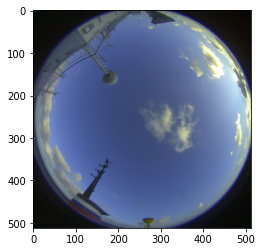

In [209]:
img = plt.imread("/content/train/img-2019-12-11T08-57-56devID1.jpg")
plt.imshow(img)
plt.show()

In [210]:
print(train.shape)
print(test.shape)
print(train.shape[0] + test.shape[0])
assert(data.shape[0] == train.shape[0] + test.shape[0])
print("OK!")

(64750, 2)
(27327, 2)
92077
OK!


In [211]:
class OceanDataset(Dataset) :
  def __init__(self, meta_data, root_dir, transforms = None):
      self.annotations = meta_data
      self.root_dir = root_dir
      self.transforms = transforms
  
  def __len__(self) :
      return len(self.annotations)
  
  def __getitem__(self, index) :
      img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
      image = io.imread(img_path)
      y_label = torch.tensor(int(self.annotations.iloc[index, 1]))
      
      if self.transforms:
          image = self.transforms(image)
        
      
      return (image, y_label)

In [213]:
aug_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.CenterCrop(512),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.CenterCrop(512),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.CenterCrop(224),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [214]:
#augmentation по экспедициям
ABP42_aug = OceanDataset(meta_data = ABP42_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)
AI49_aug = OceanDataset(meta_data  = AI49_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)
AI52_aug = OceanDataset(meta_data  = AI52_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)
AMK79_aug = OceanDataset(meta_data = AMK79_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)
ANS31_aug = OceanDataset(meta_data = ANS31_data_sets, root_dir = '/content/train/',
                       transforms  = aug_transform)

In [215]:
train_data = OceanDataset(meta_data = train, root_dir = '/content/train/',
                       transforms = train_transform)

In [218]:
train_set = torch.utils.data.ConcatDataset((train_data, ANS31_aug))
print(len(train_set))
print(len(ANS31_aug))
print(len(train))

70701
5951
64750


In [219]:
train_set.__len__()

70701

In [220]:
test_set = OceanDataset(meta_data = test, root_dir = '/content/train/',
                       transforms = test_transform)

In [ ]:
print(len(ABP42_data_sets))
print(len(AI49_data_sets))
print(len(AI52_data_sets))
print(len(AMK79_data_sets))
print(len(ANS31_data_sets))
print(len(ABP42_data_sets) + len(AI49_data_sets) + len(AI52_data_sets) + len(AMK79_data_sets) + len(ANS31_data_sets))

assert(len(ABP42_data_sets) == ABP42_aug.__len__())
assert(len(AI49_data_sets) == AI49_aug.__len__())
assert(len(AI52_data_sets) == AI52_aug.__len__())
assert(len(AMK79_data_sets) == AMK79_aug.__len__())
assert(len(ANS31_data_sets) == ANS31_aug.__len__())
assert((len(ABP42_data_sets) 
        + len(AI49_data_sets) 
        + len(AI52_data_sets)
        + len(AMK79_data_sets)
        + len(ANS31_data_sets))
        == len(train)
)
print("ok!")

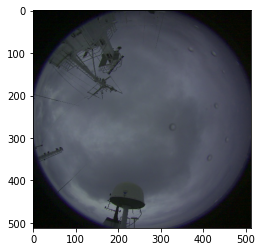

In [222]:
plt.imshow(ANS31_aug[1][0].permute(1, 2, 0))

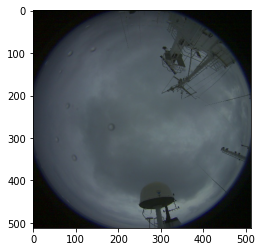

In [223]:
plt.imshow(ANS31_aug[1][0].permute(1, 2, 0))

In [224]:
train_loader = DataLoader(train_set, batch_size = 16, shuffle = True)
test_loader = DataLoader(test_set, batch_size = 16, shuffle = True)

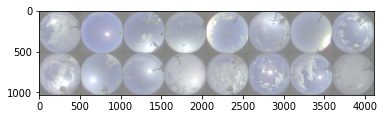

In [227]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)

images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels


##Alex_Net

In [228]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [229]:
model.classifier[1] = torch.nn.Linear(9216, 4096)
model.classifier[4] = torch.nn.Linear(4096, 1024)
model.classifier[6] = torch.nn.Linear(1024, 9)

In [230]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [231]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [232]:
print(device)

cuda:0


In [233]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [234]:
criterion = torch.nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [235]:
loss_history_train = []
epochs = 1
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0

    start_time = time.time()

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        end_time = time.time()
        time_taken = end_time - start_time

        running_loss += loss.item()
        
        if i % 200 == 199: 
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            print('Time:',time_taken)
            loss_history_train.append(running_loss)
            running_loss = 0.0


print('Finished Training of AlexNet')

[1,   200] loss: 1.468
Time: 63.56352400779724
[1,   400] loss: 1.106
Time: 128.23125219345093
[1,   600] loss: 0.935
Time: 193.48347210884094
[1,   800] loss: 0.780
Time: 259.1771318912506
[1,  1000] loss: 0.696
Time: 324.444846868515
[1,  1200] loss: 0.557
Time: 389.1164107322693
[1,  1400] loss: 0.472
Time: 453.6295232772827
[1,  1600] loss: 0.433
Time: 516.6433701515198
[1,  1800] loss: 0.318
Time: 582.0051491260529
[1,  2000] loss: 0.303
Time: 647.9980809688568
[1,  2200] loss: 0.258
Time: 712.1878800392151
[1,  2400] loss: 0.215
Time: 777.9158368110657
[1,  2600] loss: 0.189
Time: 842.6493372917175
[1,  2800] loss: 0.182
Time: 906.1964929103851
[1,  3000] loss: 0.146
Time: 970.6676173210144
[1,  3200] loss: 0.151
Time: 1036.3761796951294
[1,  3400] loss: 0.134
Time: 1100.3414766788483
[1,  3600] loss: 0.100
Time: 1165.286729335785
[1,  3800] loss: 0.107
Time: 1229.193114042282
[1,  4000] loss: 0.105
Time: 1292.7305085659027
[1,  4200] loss: 0.123
Time: 1356.7540588378906
[1,  440

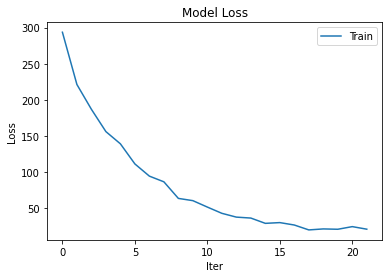

In [236]:
plt.plot(loss_history_train)
plt.title("Model Loss")
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()

In [237]:
correct = 0
total = 0

with torch.no_grad():
    for test_elem in test_loader:
        images, labels = test_elem[0].to(device), test_elem[1].to(device)
        predict_set = model(images)
        _, predicted = torch.max(predict_set.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(100 * correct / total)

61.865554213781245


In [238]:
correct = 0
total = 0
predict_set = None
with torch.no_grad():
    for test_elem in test_loader:
        images, labels = test_elem[0].to(device), test_elem[1].to(device)
        predict_set = model(images)
        _, predicted = torch.max(predict_set.data, 1) 

        total += labels.size(0)
        correct += (abs(labels - predicted) <= 1).sum().item()


print(100 * correct / total)

82.95824642295166


In [239]:
correct = 0
total = 0
predict_set = None
count = 0
with torch.no_grad():
    for test_elem in test_loader:
        images, labels = test_elem[0].to(device), test_elem[1].to(device)
        predict_set = model(images)
        _, predicted = torch.max(predict_set.data, 1)
        print(torch.max(predict_set.data, 1))
        print("--------")
        print(labels)
        print("\n")
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if count == 2 :
            break
        count += 1


print(100 * correct / total)

torch.return_types.max(
values=tensor([23.4524,  6.9520,  3.6407,  5.5751, 17.3017,  4.0716,  4.7589,  7.3108,
        21.4672, 22.0188,  2.7457, 18.9162,  7.3804,  6.6353,  3.0045,  7.9280],
       device='cuda:0'),
indices=tensor([8, 7, 6, 4, 8, 4, 7, 5, 8, 8, 8, 8, 7, 7, 4, 6], device='cuda:0'))
--------
tensor([8, 7, 5, 4, 7, 5, 8, 6, 8, 8, 7, 8, 4, 5, 4, 8], device='cuda:0')


torch.return_types.max(
values=tensor([16.4927, 18.9067, 19.2490, 10.5368, 15.5732,  7.7671,  8.5715,  7.3241,
        10.1902, 17.2812, 27.8674,  5.0673,  5.6794,  8.0783, 11.0572, 15.7162],
       device='cuda:0'),
indices=tensor([8, 8, 0, 8, 8, 8, 7, 3, 6, 8, 8, 1, 4, 6, 4, 6], device='cuda:0'))
--------
tensor([8, 8, 0, 8, 8, 8, 7, 4, 5, 8, 8, 1, 3, 8, 3, 5], device='cuda:0')


torch.return_types.max(
values=tensor([13.7936,  5.3467,  2.7112, 28.9637, 24.5526,  8.7914, 19.7496, 25.0784,
        21.0655,  3.5843, 29.0211,  7.6911,  3.6196, 24.1271, 25.2810, 21.7310],
       device='cuda:0'),
indices=tenso

In [240]:
class_correct = list(0. for i in range(9))
class_total = list(0. for i in range(9))

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()

        for i in range(labels.shape[0]):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(9):
    print('Accuracy of %5s : %2d %%' % (
        i, 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 91 %
Accuracy of     1 : 12 %
Accuracy of     2 : 23 %
Accuracy of     3 : 19 %
Accuracy of     4 : 30 %
Accuracy of     5 :  0 %
Accuracy of     6 : 27 %
Accuracy of     7 : 25 %
Accuracy of     8 : 86 %
